# Python代码部分

In [1]:
import pandas as pd
import numpy as np
from chap1_codes import *
import seaborn
import matplotlib.pyplot as plt

假设某基金经理需在 10 年末支付一笔债务，按当前的收益率计算，这笔债务的现值为 1000 元。因此到期偿还值为1000(1 + 6%)10 = 1790.85 元。
假设市场上可供选择的债券有如下 三种:

债券 A:剩余期限 10 年，息票率 6.7%; 

债券 B:剩余期限 15 年，息票率 6.988%; 

债券 C:剩余期限 30 年，息票率 5.9%。

假设三种债券当前的到期收益率都为 6%，都是每年付息 1 次，而且都是无限可分、以保证 投资者可以以任何比例分配其投资。请问投资经理该如何做?

请使用具体数字说明。例如，如果收益率保持不变，购买三种债券的结果;如果收益率下降，按 6%购买的资产会发生什么现象等，如果收益率上升会发生什么现象，并说明其操作理由(提示:可以单独购买债券，也可以购买债券组合)。

### 先考虑单买债券的情况：若只买A，B，C，则计算结果如下：

In [2]:
V_a = get_bond_face(freq=1, r=6, bond_r=6.7, bond_final=1790.85, cur_time=10, end_time=10)
V_b = get_bond_face(freq=1, r=6, bond_r=6.988, bond_final=1790.85, cur_time=10, end_time=15)
V_c = get_bond_face(freq=1, r=6, bond_r=5.9, bond_final=1790.85, cur_time=10, end_time=30)
print('分别单独购买，需要的量为：\n债券A需要买面值{:.3f}元 \n债券B需要买面值{:.3f}元 \n债券C需要买面值{:.3f}元 \n'.format(V_a, V_b, V_c))

分别单独购买，需要的量为：
债券A需要买面值951.005元 
债券B需要买面值912.446元 
债券C需要买面值1013.958元 



### 若市场收益率下降，不妨设为5%，则三个债券的终值为计算如下

In [3]:
bondA_r5 = get_bond_price_cur(freq=1, r=5, bond_r=6.7, bond_face=V_a, end_time=10, cur_time=10, start_time=0)
bondB_r5 = get_bond_price_cur(freq=1, r=5, bond_r=6.988, bond_face=V_b, end_time=15, cur_time=10, start_time=0)
bondC_r5 = get_bond_price_cur(freq=1, r=5, bond_r=5.9, bond_face=V_c, end_time=30, cur_time=10, start_time=0)
print('市场收益率下跌为5%时，三个债券的终值为：\n债券A:{:.3f}元 \n债券B:{:.3f}元 \n债券C:{:.3f}元 \n'.format(bondA_r5, bondB_r5, bondC_r5))

市场收益率下跌为5%时，三个债券的终值为：
债券A:1752.435元 
债券B:1792.968元 
债券C:1880.138元 



### 若市场收益率上升，不妨设为7%，则三个债券的终值为计算如下

In [4]:
bondA_r5 = get_bond_price_final(freq=1, r=7, bond_r=6.7, bond_face=V_a, end_time=10, start_time=0)
bondB_r5 = get_bond_price_final(freq=1, r=7, bond_r=6.988, bond_face=V_b, end_time=10, start_time=0)
bondC_r5 = get_bond_price_final(freq=1, r=7, bond_r=5.9, bond_face=V_c, end_time=10, start_time=0)
print('市场收益率下跌为5%时，三个债券的终值为：\n债券A:{:.3f}元 \n债券B:{:.3f}元 \n债券C:{:.3f}元 \n'.format(bondA_r5, bondB_r5, bondC_r5))

市场收益率下跌为5%时，三个债券的终值为：
债券A:1831.352元 
债券B:1793.406元 
债券C:1840.507元 



### 三种债券的市场收益率变化曲线：

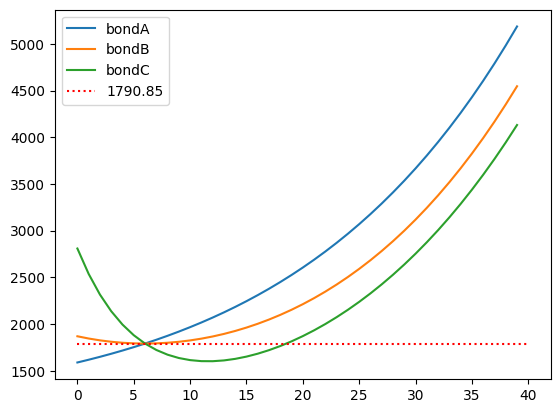

In [5]:
bondA_final, bondB_final, bondC_final = [],[],[]
x_axis = [i for i in range(0,40)]
for r in x_axis:
    bondA_final.append(get_bond_price_cur(freq=1, r=r, bond_r=6.7, bond_face=V_a, end_time=10, cur_time=10, start_time=0))
    bondB_final.append(get_bond_price_cur(freq=1, r=r, bond_r=6.988, bond_face=V_b, end_time=15, cur_time=10, start_time=0))
    bondC_final.append(get_bond_price_cur(freq=1, r=r, bond_r=5.9, bond_face=V_c, end_time=30, cur_time=10, start_time=0))
plt.plot(x_axis, bondA_final, label='bondA')
plt.plot(x_axis, bondB_final, label='bondB')
plt.plot(x_axis, bondC_final, label='bondC')
plt.hlines(xmin=0, xmax=40, y=1790.85, linestyles='dotted', colors='red', label='1790.85')
plt.legend()
plt.show()

### 可见三种债券价格都随着收益率的增加而增加， 下面计算久期和凸度

首先计算现值

In [6]:
bondA_price = get_bond_price_discount(freq=1, r=6, bond_r=6.7, bond_face=V_a, end_time=10, start_time=0)
bondB_price = get_bond_price_discount(freq=1, r=6, bond_r=6.988, bond_face=V_b, end_time=15, start_time=0)
bondC_price = get_bond_price_discount(freq=1, r=6, bond_r=5.9, bond_face=V_c, end_time=30, start_time=0)
print('市场收益率为6%时，三个债券的现值为：\n债券A:{:.3f}元 \n债券B:{:.3f}元 \n债券C:{:.3f}元 \n'.format(bondA_price, bondB_price, bondC_price))

市场收益率为6%时，三个债券的现值为：
债券A:1000.001元 
债券B:1000.001元 
债券C:1000.001元 



In [7]:
bondA_duration = get_bond_duration(freq=1, r=6, bond_r=6.7, bond_face=V_a, bond_cur=bondA_price, end_time=10, start_time=0)
bondB_duration = get_bond_duration(freq=1, r=6, bond_r=6.988, bond_face=V_b, bond_cur=bondA_price, end_time=15, start_time=0)
bondC_duration = get_bond_duration(freq=1, r=6, bond_r=5.9, bond_face=V_c, bond_cur=bondA_price, end_time=30, start_time=0)
print('市场收益率为6%时，三个债券的久期为：\n债券A:{:.3f} \n债券B:{:.3f} \n债券C:{:.3f} \n'.format(bondA_duration, bondB_duration, bondC_duration))

市场收益率为6%时，三个债券的久期为：
债券A:7.232 
债券B:9.434 
债券C:13.808 



In [8]:
bondA_convexity = get_convexity(freq=1, r=6, bond_r=6.7, bond_face=V_a, bond_cur=bondA_price, end_time=10, start_time=0)
bondB_convexity = get_convexity(freq=1, r=6, bond_r=6.988, bond_face=V_b, bond_cur=bondB_price, end_time=15, start_time=0)
bondC_convexity = get_convexity(freq=1, r=6, bond_r=5.9, bond_face=V_c, bond_cur=bondC_price, end_time=30, start_time=0)
debt_convexity = get_convexity(freq=1, r=6, bond_r=0, bond_face=1790.85, bond_cur=1000, end_time=10, start_time=0)
print('市场收益率为6%时，三个债券的凸度为：\n债券A:{:.3f} \n债券B:{:.3f} \n债券C:{:.3f} \n债务:{:.3f} \n'.format(bondA_convexity, bondB_convexity, bondC_convexity, debt_convexity))

市场收益率为6%时，三个债券的凸度为：
债券A:67.996 
债券B:121.484 
债券C:296.141 
债务:97.900 



### 因此C个债券的久期都大于10，因而市场收益率上升时，C债券终值都会下跌，而A，B会上涨；

### 反之，市场收益率下降时，债券C升值，A下跌。而B的久期和债务久期相近，且凸度大于债务，因此无论如何变化都会上涨。

# 补充内容
# 1. 三个债券久期随收益率变化图

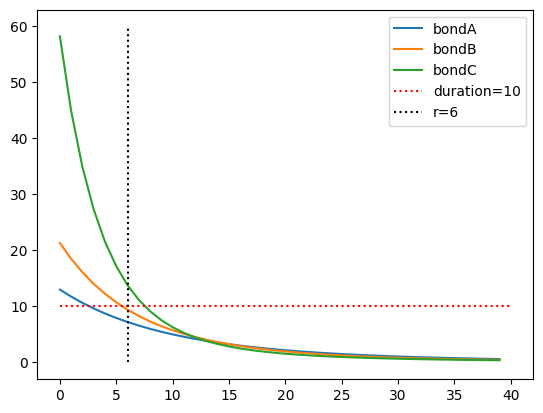

In [9]:
bondA_final, bondB_final, bondC_final = [],[],[]
x_axis = [i for i in range(0,40)]
for r in x_axis:
    bondA_final.append(get_bond_duration(freq=1, r=r, bond_r=6.7, bond_face=V_a, bond_cur=bondA_price, end_time=10, start_time=0))
    bondB_final.append(get_bond_duration(freq=1, r=r, bond_r=6.988, bond_face=V_b, bond_cur=bondB_price, end_time=15, start_time=0))
    bondC_final.append(get_bond_duration(freq=1, r=r, bond_r=5.9, bond_face=V_c, bond_cur=bondC_price, end_time=30, start_time=0))
plt.plot(x_axis, bondA_final, label='bondA')
plt.plot(x_axis, bondB_final, label='bondB')
plt.plot(x_axis, bondC_final, label='bondC')
plt.hlines(xmin=0, xmax=40, y=10, linestyles='dotted', colors='red', label='duration=10')
plt.vlines(ymin=0, ymax=60, x=6, linestyles='dotted', colors='black', label='r=6')
plt.legend()
plt.show()

# 2. 三个债券凸度随收益率变化图

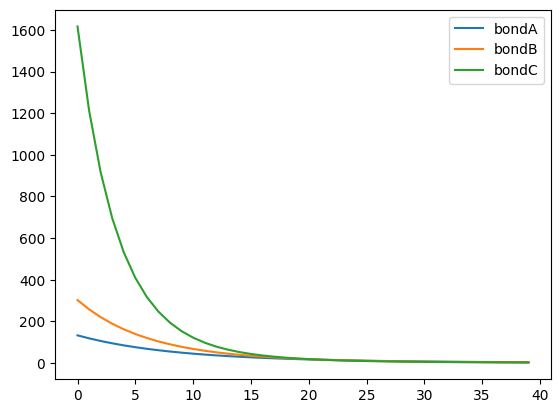

In [10]:
bondA_final, bondB_final, bondC_final = [],[],[]
x_axis = [i for i in range(0,40)]
for r in x_axis:
    bondA_final.append(get_convexity(freq=1, r=r, bond_r=6.7, bond_face=V_a, bond_cur=bondA_price, end_time=10, start_time=0))
    bondB_final.append(get_convexity(freq=1, r=r, bond_r=6.7, bond_face=V_b, bond_cur=bondB_price, end_time=15, start_time=0))
    bondC_final.append(get_convexity(freq=1, r=r, bond_r=6.7, bond_face=V_c, bond_cur=bondC_price, end_time=30, start_time=0))
plt.plot(x_axis, bondA_final, label='bondA')
plt.plot(x_axis, bondB_final, label='bondB')
plt.plot(x_axis, bondC_final, label='bondC')
#plt.hlines(xmin=0, xmax=40, y=1790.85, linestyles='dotted', colors='red', label='1790.85')
plt.legend()
plt.show()

# 附录
## 代码

In [11]:
import pandas as pd
import numpy as np
import sympy
from sympy import *

#   贴现
def discount(freq, r, T, final_value):
    return final_value/(1+0.01*r/freq)**(T*freq)
    
#   辅助函数，求表达式
def get_fx(freq, r, T, bond_r, bond_face, bond_cur):
    result = bond_face
    bond_r = 0.01*bond_r/freq
    r = 0.01*r/freq
    T *= freq
    for i in range(0, T):
        result += bond_face*bond_r * (1 + r)**i
    return result - bond_cur*(1+r)**T
#   求到期收益率
def get_r(freq, T, bond_r, bond_face, bond_cur):
    r = sympy.Symbol('r')
    fr = get_fx(freq, r, T, bond_r, bond_face, bond_cur)
    fr_diff = fr.diff(r)
    r0 = 10
    # 精度要求，当误差小于此值时，结束迭代
    prec = 1e-5
    # 最多迭代20次
    for i in range(20):
        fr_val= float(limit(fr, r, r0))
        #print(i, r0, fr_val)
        if abs(fr_val) <= prec:
            break
        diff_fr_val = float(limit(fr_diff, r, r0))
        #print('\n',fr.diff(r),diff_fr)
        r0 -= fr_val / diff_fr_val
    return r0
        
#   辅助函数，求表达式
def get_fx2(freq, r, bond_r, bond_face, bond_cur, bond_final, end_time, start_time=0):
    result = bond_final
    bond_r = 0.01*bond_r/freq
    r = 0.01*r/freq
    T = start_time * freq
    for i in range(0, int(T)):
        result -= bond_face * bond_r * (1 + r)**i
    return result - bond_cur

#   求到要买多少债券面值才能抵债
def get_bond_face(freq, r, bond_r, bond_final, end_time, start_time):
    bond_face = sympy.Symbol('bond_face')
    bond_cur = get_bond_price_discount(freq=freq, r=r, bond_r=bond_r, bond_face=bond_face, end_time=end_time, start_time=start_time)
    #print(bond_cur)
    fr = get_fx2(freq=freq, r=r, bond_r=bond_r, bond_face=bond_face, bond_cur=bond_cur, bond_final=bond_final, end_time=end_time, start_time=start_time)
    fr_diff = fr.diff(bond_face)
    bond_face0 = 10**7
    # 精度要求，当误差小于此值时，结束迭代
    prec = 1e-5
    # 最多迭代20次
    for i in range(20):
        fr_val= float(limit(fr, bond_face, bond_face0))
        #print(i, bond_face0, fr_val)
        if abs(fr_val) <= prec:
            break
        diff_fr_val = float(limit(fr_diff, bond_face, bond_face0))
        #print('\n',fr.diff(r),diff_fr)
        bond_face0 -= fr_val / diff_fr_val
    return bond_face0


#   获取债券贴现价格
def get_bond_price_discount(freq, r, bond_r, bond_face, end_time, start_time=0):
    '''
    args:
    freq: 每年付息次数
    start_time: 期初
    end_time: 债券年限
    r: 市场收益率*100, 如6表示6%
    bond_r: 债券息票率
    bond_face: 面值
    '''
    
    start_time *= freq
    end_time *= freq
    time_gap = end_time-start_time
    r = 0.01*r/freq
    bond_r = 0.01*bond_r/freq
    bond_price = bond_face/(1+r)**time_gap
    for i in range(1, int(time_gap)+1):
        bond_price += bond_face*bond_r/((1+r)**i)
    return bond_price

#   获取债券终值价格
def get_bond_price_final(freq, r, bond_r, bond_face, end_time, start_time=0):
    '''
    args:
    freq: 每年付息次数
    start_time: 期初(一般为0)
    end_time: 期初+债券年限
    cur_time: 当前时点
    r: 市场收益率*100, 如6表示6%
    bond_r: 债券息票率
    bond_face: 面值
    '''
    end_time -= start_time
    end_time *= freq
    time_gap = end_time
    r = 0.01*r/freq
    bond_r = 0.01*bond_r/freq
    bond_price = bond_face
    for i in range(0, int(time_gap)):
        bond_price += bond_face*bond_r*((1+r)**i)
    return bond_price

#   获取中间某时间点债券价格
def get_bond_price_cur(freq, r, bond_r, bond_face, cur_time, end_time, start_time=0):
    end_time -= start_time
    cur_time -= start_time
    T = (cur_time - start_time)*freq
    bond_price = get_bond_price_discount(freq=freq, r=r, bond_r=bond_r, bond_face=bond_face, end_time=end_time, start_time=cur_time)
    r = 0.01*r/freq
    bond_r = 0.01*bond_r/freq
    for t in range(int(T)):
        bond_price += bond_face*bond_r*((1+r)**t)
    return bond_price




#   计算修正久期，单位为年
def get_bond_duration(freq, r, bond_r, bond_face, bond_cur, end_time, start_time=0):
    '''
    args:
    T: 债券剩余年限
    bond_cur: 债券现值
    '''
    r = 0.01*r/freq
    bond_r = 0.01*bond_r/freq
    T = (end_time - start_time) * freq
    duration = T*bond_face/(1+r)**(T+1)/(freq)
    for t in range(1, int(T)+1):
        duration += t*bond_face*bond_r/(1+r)**(t+1)/(freq)
    return duration/bond_cur

def get_convexity(freq, r, bond_r, bond_face, bond_cur, end_time, start_time=0):
    r = 0.01*r/freq
    bond_r = 0.01*bond_r/freq
    T = (end_time - start_time) * freq
    convexity = T*(T+1)*bond_face/(1+r)**(T+2)/(freq**2)
    for t in range(1, int(T)+1):
        convexity += t*(t+1)*bond_face*bond_r/(1+r)**(t+2)/(freq**2)
    return convexity/bond_cur